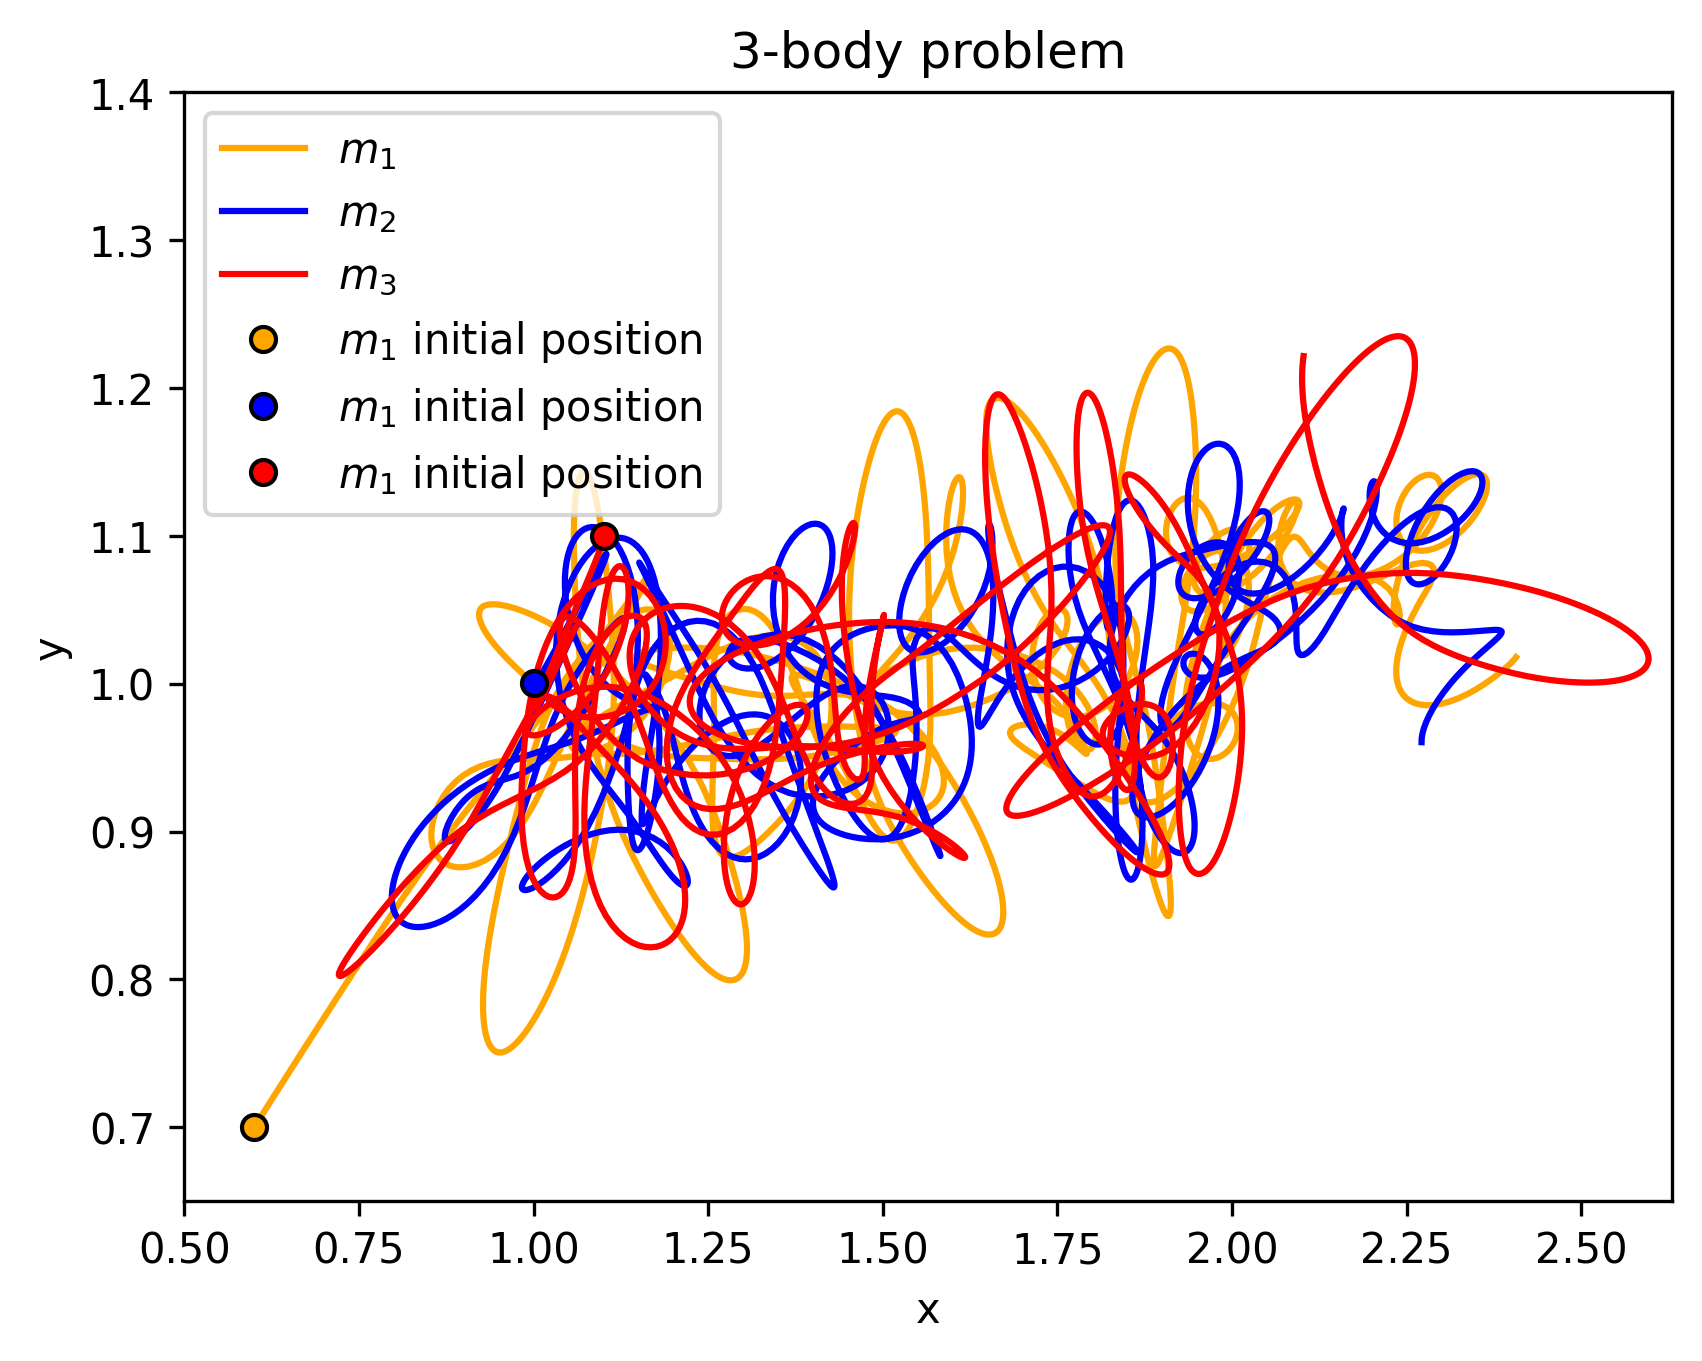

[0.60016102 0.700093   0.700193  ]
[1.00141744 1.00043652 1.00043652]
[1.10046154 1.09967048 1.09967048] 

[2.40646663 1.01794978 0.97335746]
[2.27123702 0.96045151 0.94109591]
[2.10229636 1.22160072 1.48555062] 

2.5961734521234687
0.6001610174598625
X-axis limits: (0.5, 2.63)
Y-axis limits: (0.65, 1.4)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 39.5  # Gravitational constant in AU^3 / yr^2 / solar mass
m1, m2, m3 = 1.0, 3.00273e-6, 3.694e-8  # Masses of the Sun, Earth, Moon

# LEqual masses
m1, m2, m3 = 1.0, 1.0, 1.0

# Initial conditions: positions (AU) and velocities (AU/yr)
x1, y1, z1, vx1, vy1, vz1 = .6, .7, .7, 0.04, 0, 0.1  # Sun
x2, y2, z2, vx2, vy2, vz2 = 1, 1, 1, 1, 1*10**-6, 0  # Earth
x3, y3, z3, vx3, vy3, vz3 = 1.1, 1.1, 1.1, 1, 0.2, 0.2+10**-6+10**-6  # Third body 

# Time parameters
dt = 0.001  # Time step in years
total_time = 2  # Total simulation time in years
num_steps = int(total_time / dt)

# Arrays to store positions
positions = np.zeros((3, num_steps, 3))  # 3 bodies, num_steps, 3 dimensions (x, y, z)

dampening_factor = 0.1

# Main simulation loop
for i in range(num_steps):
    # Calculate distances and forces
    dx21, dy21, dz21 = x2 - x1, y2 - y1, z2 - z1  # Distance from body 1 to 2
    dx31, dy31, dz31 = x3 - x1, y3 - y1, z3 - z1  # Distance from body 1 to 3
    dx32, dy32, dz32 = x3 - x2, y3 - y2, z3 - z2  # Distance from body 2 to 3

    r21 = np.sqrt(dx21**2 + dy21**2 + dz21**2 + dampening_factor**2)
    r31 = np.sqrt(dx31**2 + dy31**2 + dz31**2 + dampening_factor**2)
    r32 = np.sqrt(dx32**2 + dy32**2 + dz32**2 + dampening_factor**2)

    # Force calculations
    F21 = -G * m1 * m2 / r21**2
    F31 = -G * m1 * m3 / r31**2
    F32 = -G * m2 * m3 / r32**2

    # Direction of forces
    Fx21, Fy21, Fz21 = F21 * dx21 / r21, F21 * dy21 / r21, F21 * dz21 / r21
    Fx31, Fy31, Fz31 = F31 * dx31 / r31, F31 * dy31 / r31, F31 * dz31 / r31
    Fx32, Fy32, Fz32 = F32 * dx32 / r32, F32 * dy32 / r32, F32 * dz32 / r32

    # Update velocities
    vx1 += dt * (-Fx21 - Fx31) / m1
    vy1 += dt * (-Fy21 - Fy31) / m1
    vz1 += dt * (-Fz21 - Fz31) / m1

    vx2 += dt * (Fx21 - Fx32) / m2
    vy2 += dt * (Fy21 - Fy32) / m2
    vz2 += dt * (Fz21 - Fz32) / m2

    vx3 += dt * (Fx31 + Fx32) / m3
    vy3 += dt * (Fy31 + Fy32) / m3
    vz3 += dt * (Fz31 + Fz32) / m3

    # Update positions
    x1 += vx1 * dt
    y1 += vy1 * dt
    z1 += vz1 * dt

    x2 += vx2 * dt
    y2 += vy2 * dt
    z2 += vz2 * dt

    x3 += vx3 * dt
    y3 += vy3 * dt
    z3 += vz3 * dt

    # Store positions for plotting
    positions[0, i] = [x1, y1, z1]
    positions[1, i] = [x2, y2, z2]
    positions[2, i] = [x3, y3, z3]


# Plotting (example for 2D plot)
fig, ax = plt.subplots(dpi=300)
# setting x and y axis range
ax.set_xlim(0.5034289245962954, 2.6306549675947704)
ax.set_ylim(0.6457178510793683, 1.8419710987357178)
ax.plot(positions[0, :, 0], positions[0, :, 1],label=r'$m_1$', color='orange')
#plt.plot([], [], 'o', color='yellow', markersize=50, markeredgecolor='orange', markeredgewidth=1)  # first body, larger dot
ax.plot(positions[1, :, 0], positions[1, :, 1], label=r'$m_2$' , color='blue')
ax.plot(positions[2, :, 0], positions[2, :, 1], label=r'$m_3$', color='red')

# Plotting starting positions
ax.plot(positions[0, 0, 0], positions[0, 0, 1], 'o', label=r'$m_1$ initial position', color='orange', markeredgecolor='black', markeredgewidth=1)
#plt.plot([], [], 'o', color='yellow', markersize=50, markeredgecolor='orange', markeredgewidth=1)  # first body, larger dot
ax.plot(positions[1, 0, 0], positions[1, 0, 1], 'o', label=r'$m_1$ initial position', color='blue', markeredgecolor='black', markeredgewidth=1)
ax.plot(positions[2, 0, 0], positions[2, 0, 1], 'o', label=r'$m_1$ initial position',  color='red', markeredgecolor='black', markeredgewidth=1)
plt.legend()
# Set the axis limits manually
ax.set_xlim(0.5, 2.63)
ax.set_ylim(0.65, 1.4)

# Give axis names
plt.xlabel('x')
plt.ylabel('y')
# Set title
plt.title('3-body problem')
plt.show()


# Print starting and ending positions
print(positions[0, 0, :])
print(positions[1, 0, :])
print(positions[2, 0, :],'\n')
print(positions[0, -1, :])
print(positions[1, -1, :])
print(positions[2, -1, :],'\n')

# the highest value of any bodys position
print(np.max(positions))

# the lowest value of any bodys position
print(np.min(positions))

# Get the automatically set axis limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Display the limits
print(f"X-axis limits: {xlim}")
print(f"Y-axis limits: {ylim}")





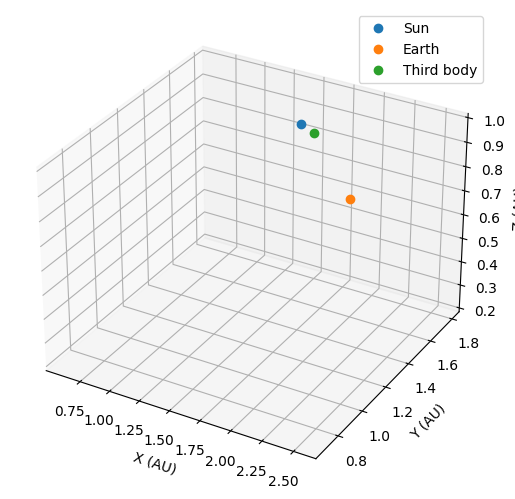

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#positions = np.zeros((3, num_steps, 3))  # 3 bodies, num_steps, 3 dimensions (x, y, z)

x1, y1, z1 = positions[0, :, 0], positions[0, :, 1], positions[0, :, 2]
x2, y2, z2 = positions[1, :, 0], positions[1, :, 1], positions[1, :, 2]
x3, y3, z3 = positions[2, :, 0], positions[2, :, 1], positions[2, :, 2]

# Initialize figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Customize the plot
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)  # Remove padding
#ax.set_facecolor('black')  # Change background to black
#ax.set_axis_off()  # Remove the axes

# distance_range = np.max([abs(np.max(positions)), abs(np.min(positions))])   # AU range for visibility
# ax.set_xlim([-distance_range, distance_range])
# ax.set_ylim([-distance_range, distance_range])
# ax.set_zlim([-distance_range, distance_range])

# distance_pos = 3   # AU range for visibility
# distance_neg = 0.2
# ax.set_xlim([distance_neg, distance_pos])
# ax.set_ylim([distance_neg, distance_pos])
# ax.set_zlim([distance_neg, distance_pos])

distance_pos = 1   # AU range for visibility
distance_neg = 0.2
ax.set_xlim([xlim[0], xlim[1]])
ax.set_ylim([ylim[0], ylim[1]])
ax.set_zlim([distance_neg, distance_pos])

# Prepare lines for each body
line1, = ax.plot([], [], [], 'o', label='Sun')
line2, = ax.plot([], [], [], 'o', label='Earth')
line3, = ax.plot([], [], [], 'o', label='Third body')

# Set the axes labels
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')

# Update function for animation
def update(frame, x1, y1, z1, x2, y2, z2, x3, y3, z3, line1, line2, line3):
    rel_frame = frame * (num_steps - 1) // (frame_number - 1)

    tail = 20 # length of the tail
    # Update the data of each line to animate them
    line1.set_data(x1[rel_frame:rel_frame+tail], y1[rel_frame:rel_frame+tail])
    line1.set_3d_properties(z1[rel_frame:rel_frame+tail])
    
    line2.set_data(x2[rel_frame:rel_frame+tail], y2[rel_frame:rel_frame+tail])
    line2.set_3d_properties(z2[rel_frame:rel_frame+tail])
    
    line3.set_data(x3[rel_frame:rel_frame+tail], y3[rel_frame:rel_frame+tail])
    line3.set_3d_properties(z3[rel_frame:rel_frame+tail])

    return line1, line2, line3

frame_number = 40

ani = FuncAnimation(fig, update, frames=np.arange(0, frame_number), fargs=(x1, y1, z1, x2, y2, z2, x3, y3, z3, line1, line2, line3), interval=30, blit=True)

plt.legend()
HTML(ani.to_jshtml())

# Making a cool animation

[0.4134696513068466, 2.6537660451430374]
[0.6487366788675234, 1.2650125168585802]
done


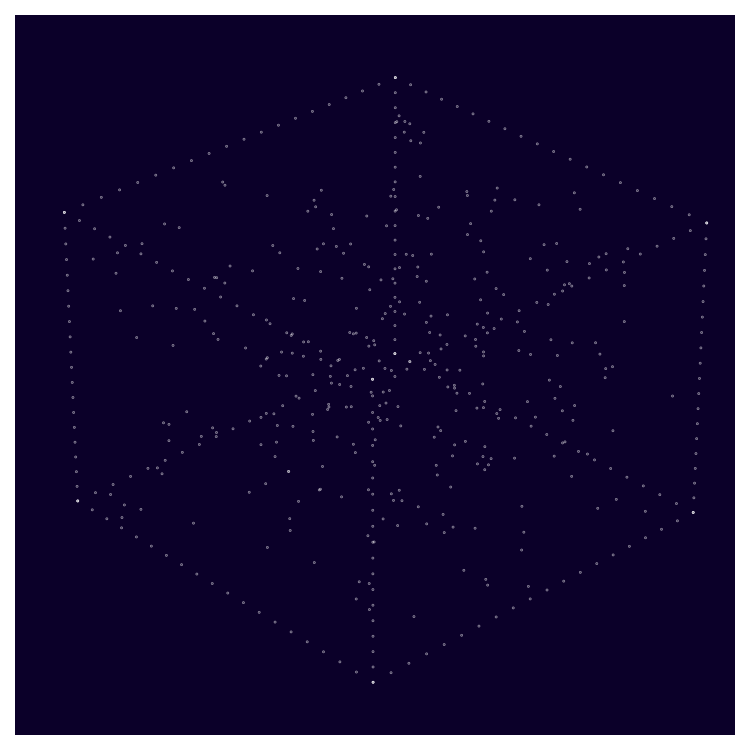

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# reduce size of x_lim and y_lim relatively to the max and min values of the positions
xlim = [np.min(positions[:, :, 0]), np.max(positions[:, :, 0])]
ylim = [np.min(positions[:, :, 1]), np.max(positions[:, :, 1])]
xlim = [xlim[0] - (xlim[1] - xlim[0]) * 0.1, xlim[1] + (xlim[1] - xlim[0]) * 0.1]
ylim = [ylim[0] - (ylim[1] - ylim[0]) * 0.1, ylim[1] + (ylim[1] - ylim[0]) * 0.1]
print(xlim)
print(ylim)

#positions = np.zeros((3, num_steps, 3))  # 3 bodies, num_steps, 3 dimensions (x, y, z)

x1, y1, z1 = positions[0, :, 0], positions[0, :, 1], positions[0, :, 2]
x2, y2, z2 = positions[1, :, 0], positions[1, :, 1], positions[1, :, 2]
x3, y3, z3 = positions[2, :, 0], positions[2, :, 1], positions[2, :, 2]

# Initialize figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Customize the plot
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)  # Remove padding
ax.set_facecolor((11/255, 0, 41/255))  # Change background to black
ax.set_axis_off()  # Remove the axes

# distance_range = np.max([abs(np.max(positions)), abs(np.min(positions))])   # AU range for visibility
# ax.set_xlim([-distance_range, distance_range])
# ax.set_ylim([-distance_range, distance_range])
# ax.set_zlim([-distance_range, distance_range])

# distance_pos = 3   # AU range for visibility
# distance_neg = 0.2
# ax.set_xlim([distance_neg, distance_pos])
# ax.set_ylim([distance_neg, distance_pos])
# ax.set_zlim([distance_neg, distance_pos])

distance_pos = 1.2   # AU range for visibility
distance_neg = 0.7
ax.set_xlim([xlim[0], xlim[1]])
ax.set_ylim([ylim[0], ylim[1]])
ax.set_zlim([distance_neg, distance_pos])

# Prepare lines for each body
line1, = ax.plot([], [], [], 'o', label='Planet 1', color='yellow', markeredgecolor='orange', markeredgewidth=1)
line2, = ax.plot([], [], [], 'o', label='Planet 2', color=(3/255, 236/255, 252/255), markeredgecolor='blue', markeredgewidth=1)
line3, = ax.plot([], [], [], 'o', label='Planet 3', color='lightgreen', markeredgecolor='green', markeredgewidth=1)

# prepare lines as tails for each body
line1_tail, = ax.plot([], [], [], '-', color='yellow', markersize=1)  # first body
line2_tail, = ax.plot([], [], [], '-', color=(3/255, 236/255, 252/255), markersize=1)  # second body
line3_tail, = ax.plot([], [], [], '-', color='lightgreen', markersize=1)  # third body

# Set the axes labels
# ax.set_xlabel('X (AU)')
# ax.set_ylabel('Y (AU)')
# ax.set_zlabel('Z (AU)')

# Create a bounding box of stars at the edge of the plot
no_dots = 20
x_box = np.linspace(xlim[0], xlim[1], no_dots)
y_box = np.linspace(ylim[0], ylim[1], no_dots)
z_box = np.linspace(distance_neg, distance_pos, no_dots)

zeros = np.zeros(len(x_box))
x_max = np.ones(len(x_box)) * xlim[1]
y_max = np.ones(len(x_box)) * ylim[1]
z_max = np.ones(len(x_box)) * distance_pos
x_min = np.ones(len(x_box)) * xlim[0]
y_min = np.ones(len(x_box)) * ylim[0]
z_min = np.ones(len(x_box)) * distance_neg

ax.scatter(x_box, y_max, z_max, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_box, y_min, z_max, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_box, y_max, z_min, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_box, y_min, z_min, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_max, y_box, z_max, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_min, y_box, z_max, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_max, y_box, z_min, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_min, y_box, z_min, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_max, y_max, z_box, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_min, y_max, z_box, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_max, y_min, z_box, 'o', color='white', alpha=0.6, s=0.1)
ax.scatter(x_min, y_min, z_box, 'o', color='white', alpha=0.6, s=0.1)

# Create stars in the background
num_stars = 300  # Number of stars you want to create
star_x = np.random.uniform(xlim[0], xlim[1], num_stars)
star_y = np.random.uniform(ylim[0], ylim[1], num_stars)
star_z = np.random.uniform(distance_neg, distance_pos, num_stars)
ax.scatter(star_x, star_y, star_z, s=0.1, color='white', alpha=0.6)

#ax.view_init(elev=30, azim=45, roll=15)
ax.view_init(elev=30, azim=-45)

# Update function for animation
def update(frame, x1, y1, z1, x2, y2, z2, x3, y3, z3, line1, line2, line3):
    rel_frame = frame * (num_steps - 1) // (frame_number - 1)
    ax.view_init(elev=30, azim=-45+frame*0.38)
    tail = 20 # length of the tail
    dot_cord = rel_frame + tail 

    line1_tail.set_data(x1[rel_frame:rel_frame+tail], y1[rel_frame:rel_frame+tail])
    line1_tail.set_3d_properties(z1[rel_frame:rel_frame+tail])

    line2_tail.set_data(x2[rel_frame:rel_frame+tail], y2[rel_frame:rel_frame+tail])
    line2_tail.set_3d_properties(z2[rel_frame:rel_frame+tail])

    line3_tail.set_data(x3[rel_frame:rel_frame+tail], y3[rel_frame:rel_frame+tail])
    line3_tail.set_3d_properties(z3[rel_frame:rel_frame+tail])

    # Update the data of each line to animate them
    line1.set_data(x1[dot_cord:dot_cord+1], y1[dot_cord:dot_cord+1])
    line1.set_3d_properties(z1[dot_cord:dot_cord+1])
    
    line2.set_data(x2[dot_cord:dot_cord+1], y2[dot_cord:dot_cord+1])
    line2.set_3d_properties(z2[dot_cord:dot_cord+1])
    
    line3.set_data(x3[dot_cord:dot_cord+1], y3[dot_cord:dot_cord+1])
    line3.set_3d_properties(z3[dot_cord:dot_cord+1])

    return line1, line2, line3

# Change dpi of 3d plot
fig.dpi = 150

# number of seconds of the animation for 30 fps is frame_number / 30
frame_number = 240*2
 # interval is in milliseconds, son number of seconds is frame_number * interval / 1000

 # Going from frames per second to interval in milliseconds: interval = 1000 / fps
ani = FuncAnimation(fig, update, frames=np.arange(0, frame_number), fargs=(x1, y1, z1, x2, y2, z2, x3, y3, z3, line1, line2, line3), interval=33.3, blit=True)


#plt.legend()
#HTML(ani.to_jshtml())
print('done')
ani.save('three_body_problem_pretty.gif', writer='pillow', fps=30)